In [1]:
# check if packages can be loaded, i.e. they are already installed
library(ggplot2) # for visualisation
library(MASS) # for LDA nd QDA
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




2 Bayes Classifier (Written Exe)

2.2 Posterior function in R

In [2]:
posterior <- function(x, pi0 = 0.5, mu0 = 4, mu1 = 5, sigma = 1){
    (dnorm(x, mean = mu1, sd = sigma)) * (1 - pi0) /
    (dnorm(x, mean = mu1, sd = sigma) * (1 - pi0) +
    dnorm(x, mean = mu0, sd = sigma) * pi0)
}

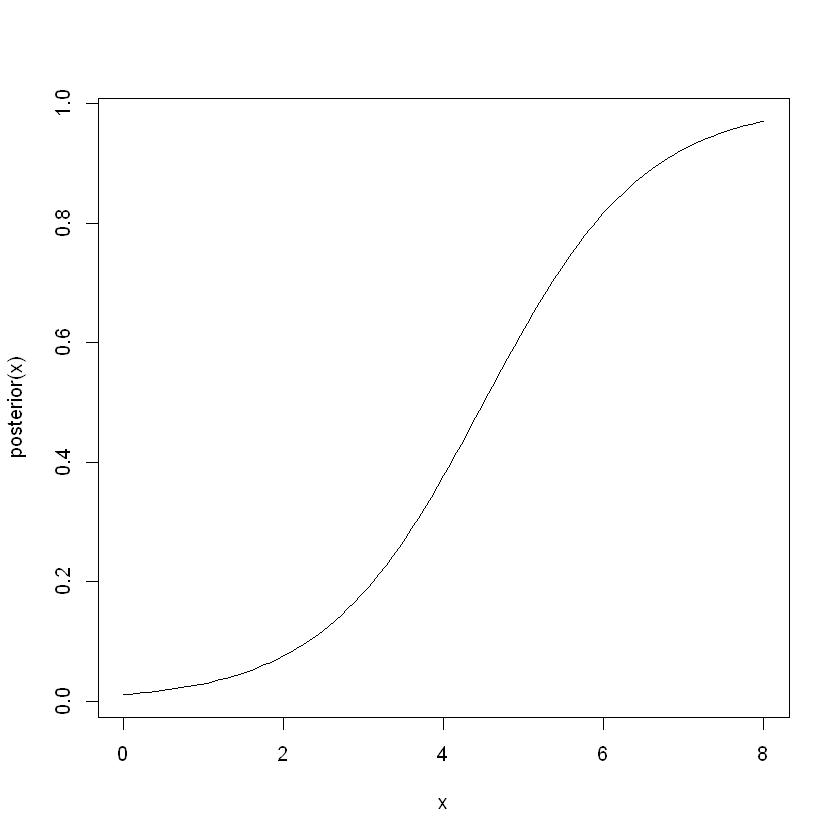

In [3]:
curve(posterior, from = 0, to = 8)

In [4]:
posterior(4.5) # 4.5 is exactly in the middle of the two expection values

[1] 0.5

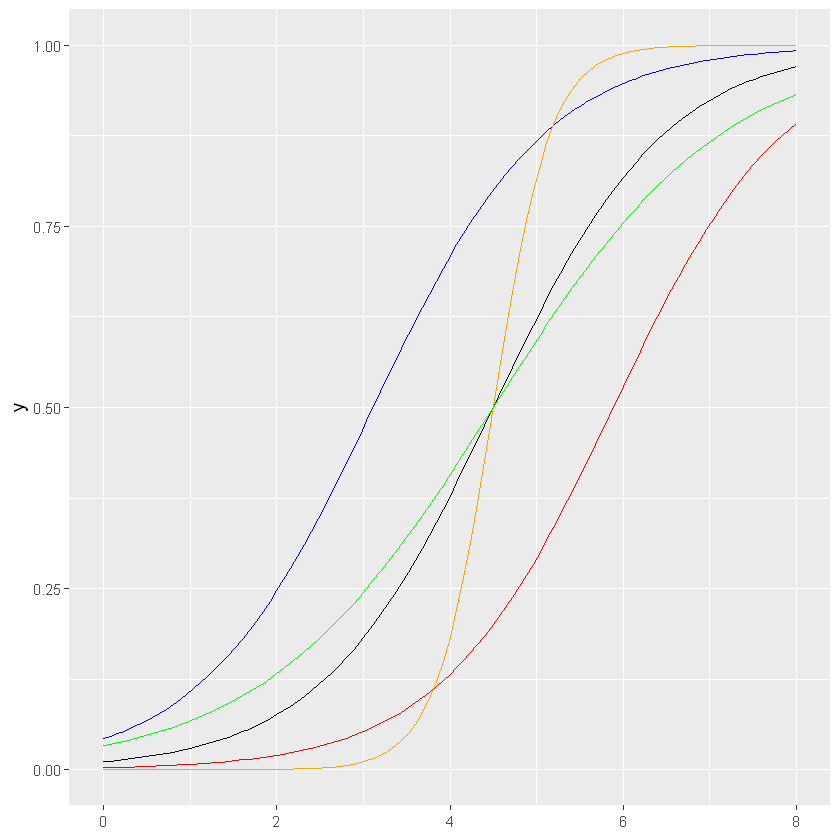

In [5]:
library(ggplot2)
ggplot() +
geom_function(fun = posterior, col = "black") +
geom_function(fun = posterior,
    args = list(pi0 = 0.8), col = "red") +
geom_function(fun = posterior,
    args = list(pi0 = 0.2), col = "blue") +
geom_function(fun = posterior,
    args = list(mu0 = 3, mu1 = 6), col = "orange") +
geom_function(fun = posterior,
    args = list(mu0 = 3, mu1 = 6, sigma = 2), col = "green") +
    scale_x_continuous(limits = c(0, 8))


2.3 LDA and QDA with the Diabetes Data

In [6]:
#==============================================================================#
# R code template Classification exercise: Diabetes                            #
#==============================================================================#

# 00: packages -----------------------------------------------------------------
library(pROC)  # install package if necessary

# 01: load data ----------------------------------------------------------------
load("./Data/Diabetes.Rda")  # ??? stands for "path/Diabetes.Rda"

In [8]:
# 03a: Train/Test Split ----
# Split the data into a train/test with 2000 observations in the test data set
set.seed(50)
n <- dim(Diabetes)[1]
testidx <- sample(n, 2000)
test <- Diabetes[testidx, ]
train <- Diabetes[-testidx, ]

table(train$YN)


  No  Yes 
7037  592 

In [9]:
library(MASS)
lda.fit1 <- lda(YN ~ Age, data = train)


Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.8128

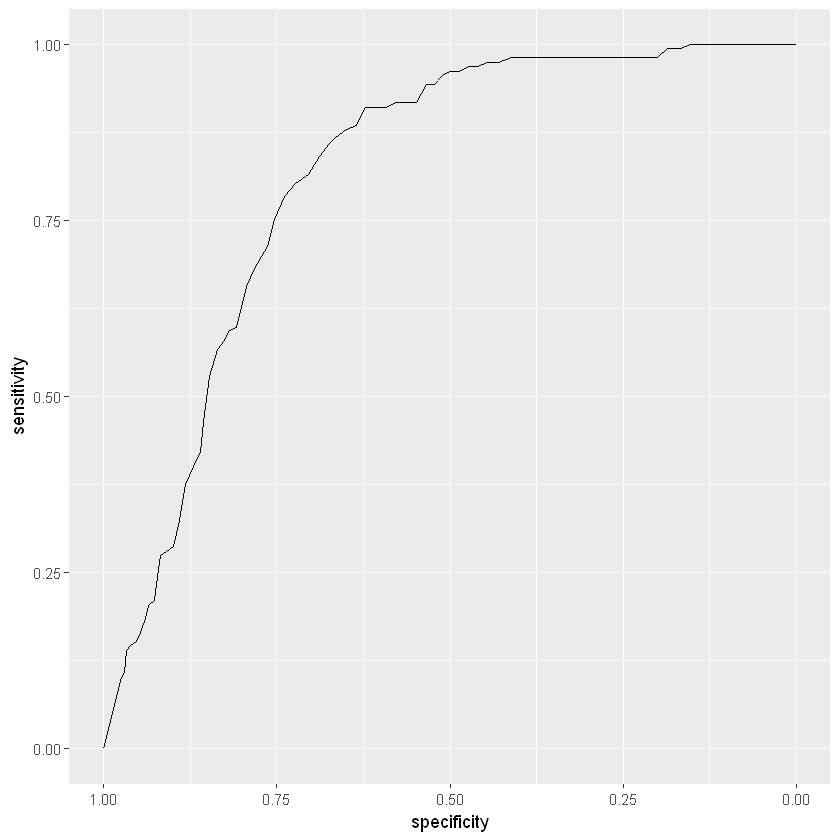

In [10]:
library(pROC)
pr1test <- predict(lda.fit1, newdata=test)
roc.obj1 <- roc(test$YN, pr1test$posterior[, 2])
ggroc(roc.obj1)
auc(roc.obj1)